## Import Libraries

In [2]:
# basic function of python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import numpy as np

# feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import feature_selection

# oversampling
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# building the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
#import tensorflow 
#from tensorflow.contrib.keras import models, layers
#from tensorflow.contrib.keras import activations, optimizers, losses

# standardize the vaiable
from sklearn.preprocessing import StandardScaler

# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# validation
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
# basic function of python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import numpy as np

# feature selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import feature_selection

# oversampling
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

# building the models
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

## Get the Data
We'll use the built in bank dataset. We can get with the load function:

In [3]:
bank=pd.read_csv('data.csv')

In [4]:
bank_prediction=pd.read_csv('futures.csv')

In [5]:
bank.head()
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40181 entries, 0 to 40180
Data columns (total 16 columns):
age               40181 non-null int64
job               40181 non-null object
marital           40181 non-null object
education         40181 non-null object
default           40181 non-null object
housing           40181 non-null object
loan              40181 non-null object
contact           40181 non-null object
day_of_week       40181 non-null object
campaign          40181 non-null int64
pdays             40181 non-null int64
poutcome          40181 non-null object
cons_price_idx    40181 non-null float64
cons_conf_idx     40181 non-null float64
prime_rate        40181 non-null float64
y                 40181 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 4.9+ MB


In [6]:
bank_prediction.head()
bank_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 15 columns):
age               1007 non-null int64
job               1007 non-null object
marital           1007 non-null object
education         1007 non-null object
default           1007 non-null object
housing           1007 non-null object
loan              1007 non-null object
contact           1007 non-null object
day_of_week       1007 non-null object
campaign          1007 non-null int64
pdays             1007 non-null int64
poutcome          1007 non-null object
cons_price_idx    1007 non-null float64
cons_conf_idx     1007 non-null float64
prime_rate        1007 non-null float64
dtypes: float64(3), int64(3), object(9)
memory usage: 118.1+ KB


In [7]:
bank_replace = bank.copy()

In [8]:
bank_replace.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40181 entries, 0 to 40180
Data columns (total 16 columns):
age               40181 non-null int64
job               40181 non-null object
marital           40181 non-null object
education         40181 non-null object
default           40181 non-null object
housing           40181 non-null object
loan              40181 non-null object
contact           40181 non-null object
day_of_week       40181 non-null object
campaign          40181 non-null int64
pdays             40181 non-null int64
poutcome          40181 non-null object
cons_price_idx    40181 non-null float64
cons_conf_idx     40181 non-null float64
prime_rate        40181 non-null float64
y                 40181 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 4.9+ MB


In [9]:
import copy

In [10]:
bank_replace = copy.deepcopy(bank)
bank_replace_prediction = copy.deepcopy(bank_prediction)

In [11]:
bank_replace.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day_of_week', 'campaign', 'pdays', 'poutcome',
       'cons_price_idx', 'cons_conf_idx', 'prime_rate', 'y'],
      dtype='object')

In [12]:
bank_replace.iloc[0]

age                        56
job                 housemaid
marital               married
education            basic.4y
default                    no
housing                    no
loan                       no
contact             telephone
day_of_week               mon
campaign                    1
pdays                     999
poutcome          nonexistent
cons_price_idx         93.994
cons_conf_idx           -36.4
prime_rate              4.857
y                          no
Name: 0, dtype: object

In [13]:
bank_replace.info() # There are 10 category variables in columns so we have to change category variables to numerical variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40181 entries, 0 to 40180
Data columns (total 16 columns):
age               40181 non-null int64
job               40181 non-null object
marital           40181 non-null object
education         40181 non-null object
default           40181 non-null object
housing           40181 non-null object
loan              40181 non-null object
contact           40181 non-null object
day_of_week       40181 non-null object
campaign          40181 non-null int64
pdays             40181 non-null int64
poutcome          40181 non-null object
cons_price_idx    40181 non-null float64
cons_conf_idx     40181 non-null float64
prime_rate        40181 non-null float64
y                 40181 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 4.9+ MB


In [14]:
bank_replace.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,unknown,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,mon,1,999,nonexistent,93.994,-36.4,4.857,no


Before data preprocessing, we try to visualize the data.

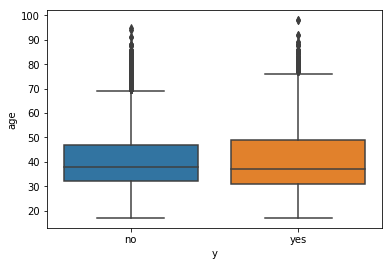

In [15]:
# age
sb.boxplot(x='y', y='age', data=bank)

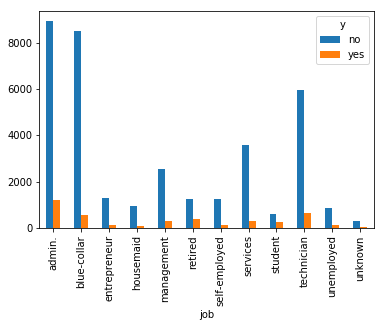

In [16]:
# job
pd.crosstab(bank['job'], bank['y']).plot(kind='bar')

In [17]:
pd.crosstab(bank['job'], bank['y'])

y,no,yes
job,,
admin.,8939,1200
blue-collar,8502,560
entrepreneur,1315,116
housemaid,945,90
management,2552,285
retired,1272,381
self-employed,1251,134
services,3606,289
student,596,249


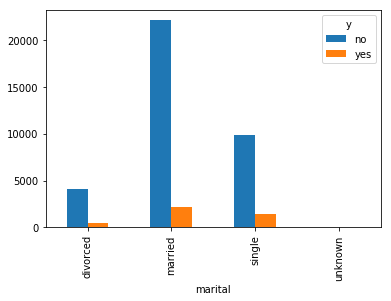

In [19]:
# marital
pd.crosstab(bank['marital'], bank['y']).plot(kind='bar')

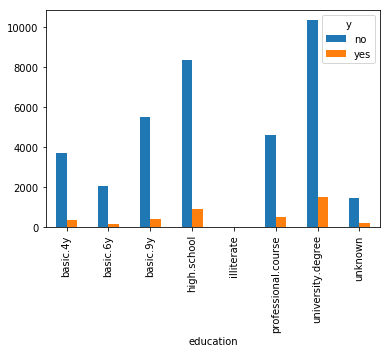

In [20]:
# education
pd.crosstab(bank['education'], bank['y']).plot(kind='bar')

default
no         78.965183
unknown    21.027351
yes         0.007466
dtype: float64


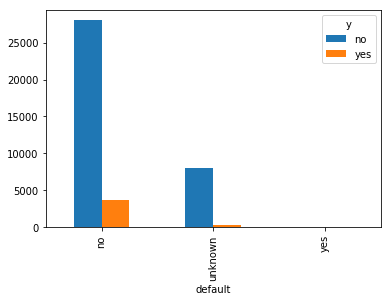

In [21]:
# default
pd.crosstab(bank['default'], bank['y']).plot(kind='bar')
print(bank.groupby(['default']).size()/len(bank)*100)

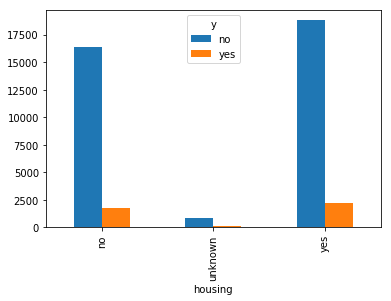

In [22]:
# housing
pd.crosstab(bank['housing'], bank['y']).plot(kind='bar')

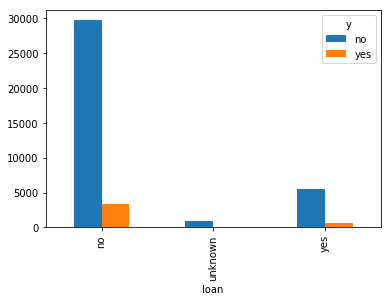

In [23]:
# "loan"
pd.crosstab(bank['loan'], bank['y']).plot(kind='bar')

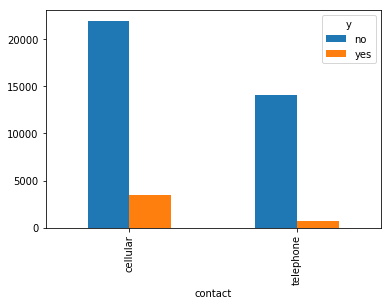

In [24]:
# "contact"
pd.crosstab(bank['contact'], bank['y']).plot(kind='bar')

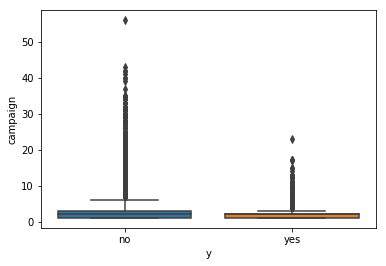

In [25]:
# campaign
sb.boxplot(x='y', y='campaign', data=bank)

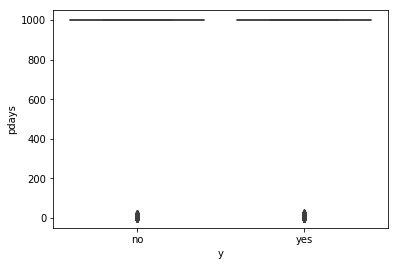

In [26]:
# pdays
sb.boxplot(x='y', y='pdays', data=bank)

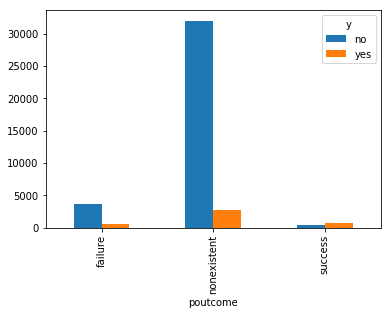

In [27]:
# "poutcome"
pd.crosstab(bank['poutcome'], bank['y']).plot(kind='bar')

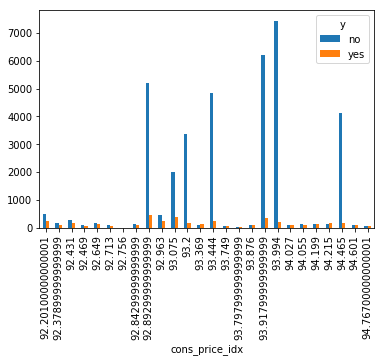

In [28]:
# "cons_price_idx"
pd.crosstab(bank['cons_price_idx'], bank['y']).plot(kind='bar')

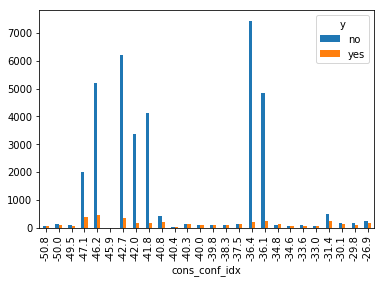

In [29]:
# "cons_conf_idx"
pd.crosstab(bank['cons_conf_idx'], bank['y']).plot(kind='bar')

We can conclude that there are many "no" response and it is hard to identify the important variables.

# Exploratory Data Analysis

In this section, we deal with the data cleaning and check out some missing data or imbalance data.

In [10]:
bank_replace.isnull() # There is no missing value

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
bank_replace.isnull().sum() # check the missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
day_of_week       0
campaign          0
pdays             0
poutcome          0
cons_price_idx    0
cons_conf_idx     0
prime_rate        0
y                 0
dtype: int64

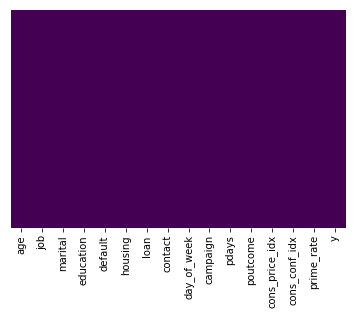

In [33]:
sb.heatmap(bank_replace.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Converting Categorical Features

We'll need to convert categorical features to numerical features. Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [13]:
# Category variables -> Numerical variables
list_feat=['job','marital','education','default','housing','loan','contact','day_of_week','poutcome']

In [14]:
for feature in list_feat:
    labels = bank[feature].astype('category').cat.categories.tolist()
    replace_map_comp = {feature : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

    bank_replace.replace(replace_map_comp, inplace=True)
    bank_replace_prediction.replace(replace_map_comp, inplace=True)

In [15]:
replace_map = {'y': {'no': 0,'yes': 1}}

In [16]:
bank_replace.replace(replace_map, inplace=True)

In [17]:
bank_replace.head()

,age,job,marital,education,default,housing,loan,contact,day_of_week,campaign,pdays,poutcome,cons_price_idx,cons_conf_idx,prime_rate,y
0,56,4,2,1,1,1,1,2,2,1,999,2,93.994,-36.4,4.857,0
1,57,8,2,4,2,1,1,2,2,1,999,2,93.994,-36.4,4.857,0
2,37,8,2,4,1,3,1,2,2,1,999,2,93.994,-36.4,4.857,0
3,40,1,2,2,1,1,1,2,2,1,999,2,93.994,-36.4,4.857,0
4,56,8,2,4,1,1,3,2,2,1,999,2,93.994,-36.4,4.857,0


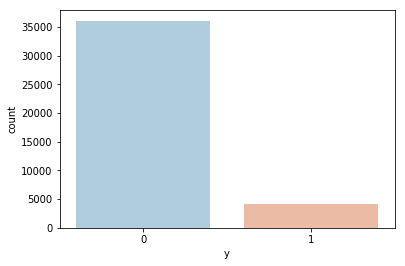

In [18]:
# checking the imbalance
sb.countplot(x='y',data=bank_replace,palette='RdBu_r') # Barplot for the dependent variable

In [19]:
bank_replace.y.value_counts()

0    36065
1     4116
Name: y, dtype: int64

## Oversampling

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [38]:
# # Separate the majority of data and the minority of data
df_majority = bank_replace[bank_replace.y==0]
df_minority = bank_replace[bank_replace.y==1]

In [39]:
# oversampling minority data
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # replace the original data
                                 n_samples=36065,    # the number of data to match with majority
                                 random_state=123) # reproducible results

ValueError: low >= high

In [40]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

NameError: name 'df_minority_upsampled' is not defined

In [37]:
sb.countplot(x='y',data=df_upsampled,palette='RdBu_r')

NameError: name 'df_upsampled' is not defined

In [24]:
# Display new class counts
df_upsampled.y.value_counts()

1    36065
0    36065
Name: y, dtype: int64

As you can see, the new DataFrame has more observations than the original, and the ratio of the two classes is now 1:1.

In [25]:
dataset=df_upsampled._get_values

In [26]:
dataset_train=dataset[:,0:-1]
dataset_label=dataset[:,-1]

In [27]:
dataset_train

array([[ 56.   ,   4.   ,   2.   , ...,  93.994, -36.4  ,   4.857],
       [ 57.   ,   8.   ,   2.   , ...,  93.994, -36.4  ,   4.857],
       [ 37.   ,   8.   ,   2.   , ...,  93.994, -36.4  ,   4.857],
       ...,
       [ 58.   ,   1.   ,   3.   , ...,  92.893, -46.2  ,   1.344],
       [ 45.   ,   1.   ,   2.   , ...,  93.918, -42.7  ,   4.962],
       [ 53.   ,  10.   ,   1.   , ...,  92.963, -40.8  ,   1.26 ]])

In [28]:
dataset_label

array([0., 0., 0., ..., 1., 1., 1.])

In [29]:
testing_data=bank_replace_prediction._get_values

In [30]:
testing_data

array([[ 42.   ,   2.   ,   2.   , ...,  93.994, -36.4  ,   4.857],
       [ 41.   ,   5.   ,   2.   , ...,  93.994, -36.4  ,   4.857],
       [ 34.   ,  10.   ,   2.   , ...,  93.994, -36.4  ,   4.857],
       ...,
       [ 37.   ,  10.   ,   3.   , ...,  94.767, -50.8  ,   1.044],
       [ 35.   ,   1.   ,   3.   , ...,  94.767, -50.8  ,   1.04 ],
       [ 73.   ,   6.   ,   2.   , ...,  94.767, -50.8  ,   1.028]])

## Feature Selection

There are 4 different feature selection techniques: univariate selection, recursive feature elimination, principle component analysis, and feature importance. So, we need to select the important features: Extra Trees Classifier and XGBClassifier

In [41]:
# Build a forest and compute the feature importances
model1 = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

model1.fit(dataset_train,dataset_label)
importances = model1.feature_importances_
std = np.std([tree.feature_importances_ for tree in model1.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

NameError: name 'dataset_train' is not defined

In [ ]:
# job
temp1 = pd.crosstab(bank['job'], bank['y'])
temp1.plot(kind='bar')
print(bank.groupby(['job']).size()/len(bank)*100)

In [32]:
# Print the feature ranking
print("Feature ranking:")

for f in range(dataset_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 14 (0.212316)
2. feature 0 (0.143998)
3. feature 9 (0.092785)
4. feature 1 (0.082810)
5. feature 3 (0.077418)
6. feature 8 (0.066422)
7. feature 13 (0.052874)
8. feature 2 (0.045619)
9. feature 12 (0.044145)
10. feature 10 (0.042815)
11. feature 5 (0.034091)
12. feature 11 (0.030057)
13. feature 7 (0.029119)
14. feature 6 (0.025675)
15. feature 4 (0.019857)


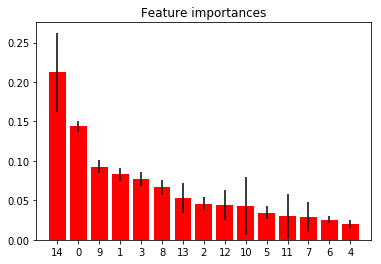

In [33]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(dataset_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(dataset_train.shape[1]), indices)
plt.xlim([-1, dataset_train.shape[1]])
plt.show()

[0.09635036 0.04087591 0.01751825 0.02919708 0.01459854 0.00145985
 0.00583942 0.0350365  0.06715328 0.10510949 0.05109489 0.05547445
 0.07445256 0.12116788 0.28467155]


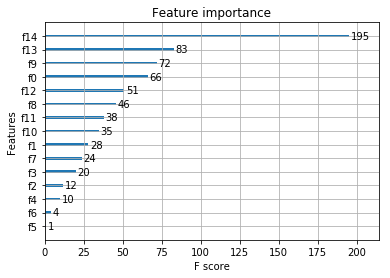

In [34]:
from xgboost import XGBClassifier
from xgboost import plot_importance

# fit model no training data
model2 = XGBClassifier()
model2.fit(dataset_train,dataset_label)
# feature importance
print(model2.feature_importances_)
# plot feature importance
plot_importance(model2)
plt.show()

In [35]:
output1=model1.feature_importances_

In [36]:
output2=model2.feature_importances_

In [37]:
# display the relative importance of each attribute
output1

array([0.14399811, 0.08280973, 0.04561929, 0.0774179 , 0.01985687,
       0.03409108, 0.02567519, 0.02911887, 0.06642161, 0.09278521,
       0.04281497, 0.03005715, 0.04414472, 0.05287373, 0.21231557])

In [38]:
output2

array([0.09635036, 0.04087591, 0.01751825, 0.02919708, 0.01459854,
       0.00145985, 0.00583942, 0.0350365 , 0.06715328, 0.10510949,
       0.05109489, 0.05547445, 0.07445256, 0.12116788, 0.28467155],
      dtype=float32)

In [39]:
output=output1+output2

In [40]:
output

array([0.24034847, 0.12368565, 0.06313754, 0.10661498, 0.03445541,
       0.03555093, 0.0315146 , 0.06415536, 0.13357489, 0.1978947 ,
       0.09390986, 0.0855316 , 0.11859728, 0.17404162, 0.49698711])

In [41]:
n=13
important_features=np.argsort(output)[::-1][:n]

In [42]:
important_features

array([14,  0,  9, 13,  8,  1, 12,  3, 10, 11,  7,  2,  5])

In [45]:
training_data=dataset_train[:,important_features]
training_label=dataset_label

NameError: name 'dataset_train' is not defined

In [44]:
testing_data=testing_data[:,important_features]

1: age, 2:job, 3: martial, 4: education, 5: default, 6: housing, 7: loan, 8:contact, 9: day_of_week 10: campaign 11: pdays 12: poutcome 13: cons_price_idx 14: cons_conf_idx 15: prime_rate

Our prediction will be based on the variables.(1: age, 2:job, 3: martial, 5: default, 7: loan, 8:contact, 9: day_of_week 10: campaign 11: pdays 12: poutcome 13: cons_price_idx 14: cons_conf_idx 15: prime_rate.) So, we will drop the variables that we do not need.(4: education, 6: housing)

## Methology

Building a model for classification prediction
we will choose Logistic Regression, K Nearest Neighbors, Decision tree, Random forest, Support Vector Machines, and Neural Network.
we will not choose K means Clustering because this is an unsupervised learning. All our data is labeled.

## 1. Building a Logistic Regression model

## Train Test Split

Let's start by splitting our data into a training set and test set

In [44]:
X_train, X_test, y_train, y_test = train_test_split(training_data,training_label,test_size=0.33,random_state=101)

NameError: name 'training_data' is not defined

## Training and Predicting

In [47]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
predictions = logmodel.predict(X_test)

## Evaluation

In [49]:
print("Accuracy is", accuracy_score(y_test,predictions)*100)

Accuracy is 72.4950636474394


In [50]:
cm1 = confusion_matrix(y_test,predictions)

In [51]:
print(cm1)

[[8966 2972]
 [3575 8290]]


In [52]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.71      0.75      0.73     11938
        1.0       0.74      0.70      0.72     11865

avg / total       0.73      0.72      0.72     23803



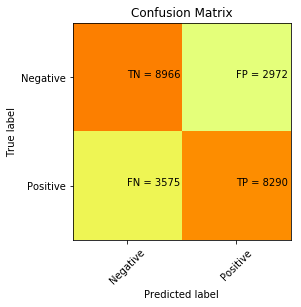

In [53]:
plt.clf()
plt.imshow(cm1, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm1[i][j]))
plt.show()

# 2. Building a K Nearest Neighbors model

## Standardize the Variables

In [42]:
scaler = StandardScaler()

In [162]:
scaler.fit(training_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
scaled_features = scaler.transform(training_data)

NameError: name 'training_data' is not defined

In [164]:
scaled_features

array([[ 1.00237932,  1.29514511, -0.56566979, ...,  1.60917684,
        -0.33151827, -1.10606387],
       [ 1.00237932,  1.37821138, -0.56566979, ...,  1.60917684,
        -0.33151827, -1.10606387],
       [ 1.00237932, -0.28311398, -0.56566979, ...,  1.60917684,
        -0.33151827,  0.92601384],
       ...,
       [-0.85648043,  1.46127765, -0.56566979, ..., -0.62143574,
         1.27809486,  0.92601384],
       [ 1.05793875,  0.38141616, -0.56566979, ..., -0.62143574,
        -0.33151827,  0.92601384],
       [-0.90092797,  1.04594631, -0.56566979, ..., -0.62143574,
        -1.9411314 , -1.10606387]])

## Train Test Split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,training_label,test_size=0.30)

## Choosing a K Value

Use the elbow method.

In [168]:
error_rate = []

# Will take some time
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

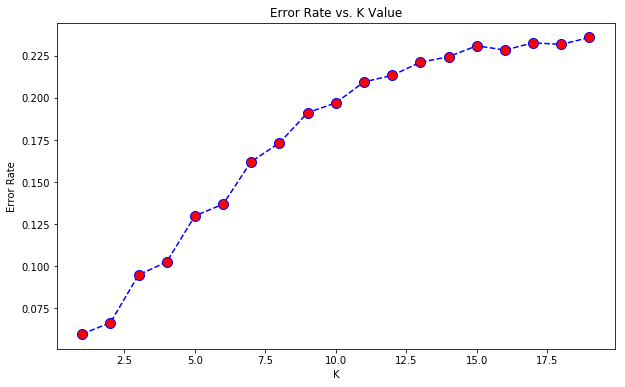

In [169]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

## Using KNN

In [61]:
knn = KNeighborsClassifier(n_neighbors=1) # n_neighbors = k

In [62]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [63]:
predictions = knn.predict(X_test)

## Predictions and Evaluations

In [64]:
print("Accuracy is", accuracy_score(y_test,predictions)*100)

Accuracy is 94.07551180738481


In [65]:
cm2 = confusion_matrix(y_test,predictions)

In [66]:
print(cm2)

[[ 9645  1143]
 [  139 10712]]


In [67]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.99      0.89      0.94     10788
        1.0       0.90      0.99      0.94     10851

avg / total       0.94      0.94      0.94     21639



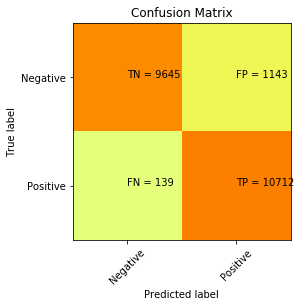

In [68]:
plt.clf()
plt.imshow(cm2, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm2[i][j]))
plt.show()

## 3. Building the Decision Tree

We'll start just by training a single decision tree.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(training_data,training_label,test_size=0.3,random_state=101)

In [70]:
dtree = DecisionTreeClassifier(criterion='entropy')

In [71]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
predictions = dtree.predict(X_test)

## Prediction and Evaluation
Let's evaluate our decision tree.

In [73]:
print("Accuracy is", accuracy_score(y_test,predictions)*100)

Accuracy is 94.28809094690142


In [74]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       1.00      0.89      0.94     10811
        1.0       0.90      1.00      0.95     10828

avg / total       0.95      0.94      0.94     21639



In [75]:
cm3 = confusion_matrix(y_test,predictions)

In [76]:
print(cm3)

[[ 9598  1213]
 [   23 10805]]


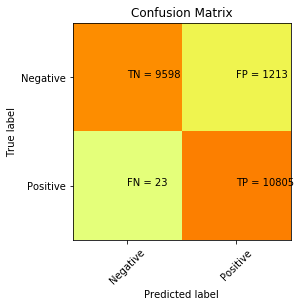

In [77]:
plt.clf()
plt.imshow(cm3, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm3[i][j]))
plt.show()

## 4. Building the Random Forests model

In [78]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [79]:
rfc_pred = rfc.predict(X_test)

In [80]:
print("Accuracy is", accuracy_score(y_test,rfc_pred)*100)

Accuracy is 96.29835020102593


In [81]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

        0.0       1.00      0.93      0.96     10811
        1.0       0.93      1.00      0.96     10828

avg / total       0.97      0.96      0.96     21639



In [82]:
cm4 = confusion_matrix(y_test,rfc_pred)

In [83]:
print(cm4)

[[10037   774]
 [   27 10801]]


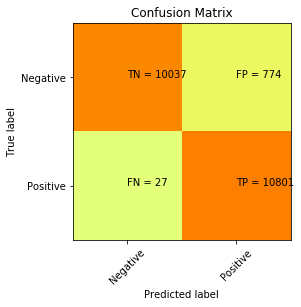

In [84]:
plt.clf()
plt.imshow(cm4, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm4[i][j]))
plt.show()

## 5. Building the Support Vector Machines model

## Train Test Split

In [171]:
X_train, X_test, y_train, y_test = train_test_split(training_data, training_label, test_size=0.30, random_state=101)

In [172]:
model = SVC()

In [173]:
model.fit(X_train,y_train) # If C is 0, we can have no margin kernel ='Radial Basis Functions'(Big cone located in all points of data set)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Predictions and Evaluations
Now let's predict using the trained model.

In [174]:
predictions = model.predict(X_test)

In [175]:
cm5 = confusion_matrix(y_test,predictions)

In [176]:
print("Accuracy is", accuracy_score(y_test,predictions)*100)

Accuracy is 82.8088174130043


In [177]:
print(cm5)

[[9245 1566]
 [2154 8674]]


In [91]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.81      0.86      0.83     10811
        1.0       0.85      0.80      0.82     10828

avg / total       0.83      0.83      0.83     21639



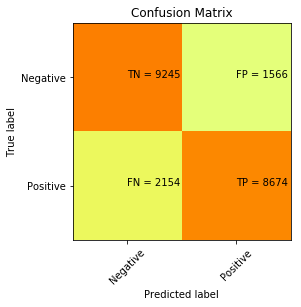

In [92]:
plt.clf()
plt.imshow(cm5, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm5[i][j]))
plt.show()

# 6. Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [93]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same - in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process).

In [94]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

What fit does is a bit more involved then usual. First, it runs the same loop with cross-validation, to find the best parameter combination. Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), to built a single new model using the best parameter setting.

In [95]:
# May take awhile!
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  57.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  54.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=  54.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total= 1.0min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total= 1.1min
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=  55.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  43.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=0.1, gamma=0.01, kernel=rbf, total=  41.2s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] .................. C=100, gamma=0.0001, kernel=rbf, total= 1.2min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total= 1.8min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total=52.2min
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV] ...................... C=1000, gamma=1, kernel=rbf, total= 1.7min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total= 4.2min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total= 4.2min
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=1000, gamma=0.1, kernel=rbf, total= 4.6min
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 551.5min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

You can inspect the best parameters found by GridSearchCV in the best_params_ attribute, and the best estimator in the best_estimator_ attribute:

In [96]:
grid.best_params_
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Then you can re-run predictions on this grid object just like you would with a normal model.

In [97]:
grid_predictions = grid.predict(X_test)

In [98]:
print("Accuracy is", accuracy_score(y_test,grid_predictions)*100)

Accuracy is 98.84005730394195


In [157]:
cm7=confusion_matrix(y_test,grid_predictions)

In [158]:
print(cm7)

[[10606   205]
 [   46 10782]]


In [159]:
print(classification_report(y_test,grid_predictions))

             precision    recall  f1-score   support

        0.0       1.00      0.98      0.99     10811
        1.0       0.98      1.00      0.99     10828

avg / total       0.99      0.99      0.99     21639



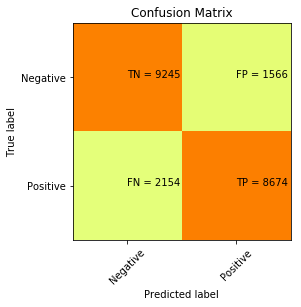

In [160]:
plt.clf()
plt.imshow(cm7, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm5[i][j]))
plt.show()

# 7. Buidling a Neural Network model

In [300]:
X_train, X_test, y_train, y_test = train_test_split(training_data, training_label, test_size=0.30, random_state=101)

In [301]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [302]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [303]:
dnn = models.Sequential()
dnn.add( layers.Dense(input_dim=n, units=20, activation='relu' )) # n =13
dnn.add( layers.Dense(units=20, activation='relu' ))
dnn.add( layers.Dense(units=20, activation='relu' ))
dnn.add( layers.Dense(units=20, activation='relu' ))
dnn.add( layers.Dense(units=20, activation='relu' ))
dnn.add( layers.Dense(units=20, activation='relu' ))
dnn.add( layers.Dense(units=20, activation='relu' ))
dnn.add( layers.Dense(units=20, activation='relu' ))
dnn.add( layers.Dense(units=20, activation='relu' ))
dnn.add( layers.Dense(units=1, activation='sigmoid' ))

In [304]:
dnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [305]:
dnn.fit(scaled_x_train, y_train, epochs=400, batch_size=100,verbose=0)

In [306]:
predictions = dnn.predict_classes(scaled_x_test)

In [307]:
len(predictions)

21639

In [308]:
len(y_test)

21639

In [309]:
print("Accuracy is ", accuracy_score(y_test,predictions)*100)

Accuracy is  83.2108692638292


In [310]:
print(classification_report(predictions,y_test))

             precision    recall  f1-score   support

          0       0.80      0.85      0.83     10160
          1       0.86      0.81      0.84     11479

avg / total       0.83      0.83      0.83     21639



In [311]:
cm6 = confusion_matrix(predictions,y_test)

In [312]:
print(cm6)

[[8669 1491]
 [2142 9337]]


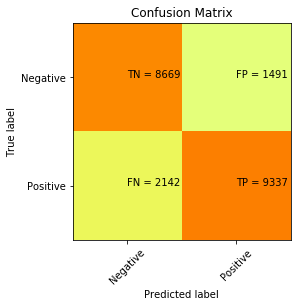

In [313]:
plt.clf()
plt.imshow(cm6, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm6[i][j]))
plt.show()

# Save a csv file about future predictions

According to our accuracy score and classification report, we can get the result that Grid Search model is the best model to predict whether a client will subscribe to a long-term deposit program. So, we will predict the decision variable('y') by using this model.

In [144]:
data_prediction=pd.read_csv('futures.csv')

In [145]:
final_prediction=grid.predict(testing_data)

In [146]:
final_prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [147]:
data_prediction['y']=final_prediction

In [149]:
data_prediction['y'].replace(0.0,'no',inplace=True)
data_prediction['y'].replace(1.0,'yes',inplace=True)

In [152]:
data_prediction.to_csv('future_prediction.csv',index=False)